In [11]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [12]:
BASE = r"C:\Users\amins\OneDrive\Desktop\Unified Mentor\Coffee Sales"
OUT = os.path.join(BASE, "outputs")

df = pd.read_csv(os.path.join(OUT, "df_features_coffee.csv"))
df['Date'] = pd.to_datetime(df['Date'])
df.head()


,Date,datetime,cash_type,card,Value,coffee_name,Return,SMA_7,SMA_30,Vol_20
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,NaN,38.70,38.70,NaN
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,0.00000,38.70,38.70,NaN
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,0.00000,38.70,38.70,NaN
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,-0.25323,36.25,36.25,NaN
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,0.33910,36.74,36.74,NaN


In [13]:
feature_cols = ['Value','Return','SMA_7','SMA_30','Vol_20']
df_model = df.dropna(subset=feature_cols)

X = df_model[feature_cols]
y = df_model['Value']   # predict next day's Value


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


In [15]:
rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(n_estimators=300, random_state=42)

In [16]:
pred = rf.predict(X_test)

mae = mean_absolute_error(y_test, pred)
rmse = mean_squared_error(y_test, pred)**0.5   # FIXED
r2 = r2_score(y_test, pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)


MAE: 0.2197309417041639
RMSE: 1.0376326972247212
R²: 0.9497725122753242


In [18]:
# Load features if not already loaded
df_features = pd.read_csv(os.path.join(OUT, "df_features_coffee.csv"))

# Define features used during training
feature_cols = X_train.columns

# Extract the last known row of features
last_row = df_features.iloc[-1][feature_cols]

# Convert it to DataFrame (model requires 2D input)
current = last_row.to_frame().T

future_preds = []

for i in range(7):
    # Predict next day value
    next_val = rf.predict(current)[0]
    future_preds.append(next_val)

    # --- update features for next forecast ---
    current['Value'] = next_val                # update main value
    current['Return'] = 0                      # cannot compute realistically
    current['SMA_7'] = current['Value'].rolling(7, min_periods=1).mean().iloc[-1]
    current['SMA_30'] = current['Value'].rolling(30, min_periods=1).mean().iloc[-1]
    current['Vol_20'] = 0                      # we cannot compute future volatility

# Final predictions
future_preds


[np.float64(32.81999999999986),
 np.float64(32.81999999999986),
 np.float64(32.81999999999986),
 np.float64(32.81999999999986),
 np.float64(32.81999999999986),
 np.float64(32.81999999999986),
 np.float64(32.81999999999986)]

In [1]:
import pandas as pd
import numpy as np
import os

# Paths
BASE = r"C:\Users\amins\OneDrive\Desktop\Unified Mentor\Coffee Sales"
OUT = os.path.join(BASE, "outputs")

# Load features file
df_features = pd.read_csv(os.path.join(OUT, "df_features_coffee.csv"))

# Select only model features
feature_cols = ['Value', 'SMA_7', 'SMA_30', 'Vol_20']
df_features = df_features.dropna(subset=feature_cols)

# Prepare the last row for forecasting
last_row = df_features[feature_cols].iloc[-1].copy()
current = last_row.to_frame().T

future_preds = []

for i in range(7):
    pred = rf.predict(current)[0]
    future_preds.append(pred)

    # Update rolling features for next day
    current['Value'] = pred
    current['SMA_7'] = (current['SMA_7'] * 6 + pred) / 7
    current['SMA_30'] = (current['SMA_30'] * 29 + pred) / 30
    current['Vol_20'] = df_features['Value'].pct_change().rolling(20).std().iloc[-1]

# Create dataframe for export
forecast_df = pd.DataFrame({
    "Day": [f"Day {i+1}" for i in range(7)],
    "Forecasted_Value": future_preds
})

# Save CSV
forecast_path = os.path.join(OUT, "coffee_forecast_7days.csv")
forecast_df.to_csv(forecast_path, index=False)

print("Saved forecast file →", forecast_path)
forecast_df


NameError: name 'rf' is not defined

In [2]:
import pandas as pd
import numpy as np
import os
from joblib import load

# Paths
BASE = r"C:\Users\amins\OneDrive\Desktop\Unified Mentor\Coffee Sales"
OUT = os.path.join(BASE, "outputs")

# Load trained model
model_path = os.path.join(OUT, "final_model_rf_coffee.joblib")
rf = load(model_path)

print("Model loaded:", model_path)

# Load features file
df_features = pd.read_csv(os.path.join(OUT, "df_features_coffee.csv"))

print("Features loaded:", df_features.shape)


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\amins\\OneDrive\\Desktop\\Unified Mentor\\Coffee Sales\\outputs\\final_model_rf_coffee.joblib'

In [3]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from joblib import dump

# Paths
BASE = r"C:\Users\amins\OneDrive\Desktop\Unified Mentor\Coffee Sales"
OUT = os.path.join(BASE, "outputs")

# Load data
df_features = pd.read_csv(os.path.join(OUT, "df_features_coffee.csv"))

# Select features
feature_cols = ['Value', 'SMA_7', 'SMA_30', 'Vol_20']
df_features = df_features.dropna(subset=feature_cols)

X = df_features[feature_cols]
y = df_features['Value']  # forecasting next day's value

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# Train model
rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)

# Evaluate
pred = rf.predict(X_test)
mae = mean_absolute_error(y_test, pred)
rmse = mean_squared_error(y_test, pred) ** 0.5
r2 = r2_score(y_test, pred)

print("Model Performance:")
print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)

# Save model
model_path = os.path.join(OUT, "final_model_rf_coffee.joblib")
dump(rf, model_path)

print("Model saved →", model_path)


Model Performance:
MAE: 0.2197309417041639
RMSE: 1.0376326972247212
R2 Score: 0.9497725122753242
Model saved → C:\Users\amins\OneDrive\Desktop\Unified Mentor\Coffee Sales\outputs\final_model_rf_coffee.joblib


In [4]:
from joblib import load
import os
import pandas as pd

BASE = r"C:\Users\amins\OneDrive\Desktop\Unified Mentor\Coffee Sales"
OUT = os.path.join(BASE, "outputs")

rf = load(os.path.join(OUT, "final_model_rf_coffee.joblib"))
df_features = pd.read_csv(os.path.join(OUT, "df_features_coffee.csv"))

print("Model loaded successfully.")
print(df_features.shape)


Model loaded successfully.
(1133, 10)


In [5]:
import pandas as pd
import numpy as np
import os

# Paths
BASE = r"C:\Users\amins\OneDrive\Desktop\Unified Mentor\Coffee Sales"
OUT = os.path.join(BASE, "outputs")

# Select only model features
feature_cols = ['Value', 'SMA_7', 'SMA_30', 'Vol_20']
df_features = df_features.dropna(subset=feature_cols)

# Prepare the last row for forecasting
last_row = df_features[feature_cols].iloc[-1].copy()
current = last_row.to_frame().T

future_preds = []

for i in range(7):
    pred = rf.predict(current)[0]
    future_preds.append(pred)

    # Update rolling features for next day
    current['Value'] = pred
    current['SMA_7'] = (current['SMA_7'] * 6 + pred) / 7
    current['SMA_30'] = (current['SMA_30'] * 29 + pred) / 30
    current['Vol_20'] = df_features['Value'].pct_change().rolling(20).std().iloc[-1]

# Create dataframe for export
forecast_df = pd.DataFrame({
    "Day": [f"Day {i+1}" for i in range(7)],
    "Forecasted_Value": future_preds
})

# Save CSV
forecast_path = os.path.join(OUT, "coffee_forecast_7days.csv")
forecast_df.to_csv(forecast_path, index=False)

print("Saved forecast file →", forecast_path)
forecast_df


Saved forecast file → C:\Users\amins\OneDrive\Desktop\Unified Mentor\Coffee Sales\outputs\coffee_forecast_7days.csv


,Day,Forecasted_Value
0,Day 1,32.82
1,Day 2,32.82
2,Day 3,32.82
3,Day 4,32.82
4,Day 5,32.82
5,Day 6,32.82
6,Day 7,32.82


In [6]:
# === Forecast vs Actual Plot ===

import os
import matplotlib.pyplot as plt

# Ensure paths
BASE = r"C:\Users\amins\OneDrive\Desktop\Unified Mentor\Coffee Sales"
OUT = os.path.join(BASE, "outputs")
FIG = os.path.join(OUT, "figures")

# 1. Load final features file
df_features = pd.read_csv(os.path.join(OUT, "df_features_coffee.csv"))

# 2. Rebuild feature matrix
feature_cols = ['SMA_7', 'SMA_30', 'Vol_20']
df_features = df_features.dropna(subset=feature_cols)

X = df_features[feature_cols]
y = df_features['Value']

# 3. Train-test split (same as before)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, shuffle=False
)

# 4. Predictions on test set
pred_test = rf.predict(X_test)

# 5. Combine for plotting
test_index = df_features.iloc[y_train.shape[0]:].index

plt.figure(figsize=(14,6))
plt.plot(df_features['Date'].iloc[test_index], y_test, label='Actual', linewidth=2)
plt.plot(df_features['Date'].iloc[test_index], pred_test, label='Predicted', linewidth=2)

# 6. Add future forecast
future_dates = pd.date_range(start=df_features['Date'].iloc[-1], periods=8, closed='right')
plt.plot(future_dates[:7], future_preds, label='7-Day Forecast', marker='o')

plt.title("Actual vs Predicted Sales + 7-Day Forecast")
plt.xlabel("Date")
plt.ylabel("Sales Value")
plt.legend()
plt.grid(True)

save_path = os.path.join(FIG, "fig_pred_vs_actual.png")
plt.savefig(save_path, dpi=300)
plt.show()

print("Saved figure:", save_path)


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Value


In [7]:
# === Forecast vs Actual Plot (Corrected with right feature set) ===

import os
import matplotlib.pyplot as plt
import pandas as pd

BASE = r"C:\Users\amins\OneDrive\Desktop\Unified Mentor\Coffee Sales"
OUT = os.path.join(BASE, "outputs")
FIG = os.path.join(OUT, "figures")

# 1. Load feature file
df_features = pd.read_csv(os.path.join(OUT, "df_features_coffee.csv"))

# Use same features used in training
feature_cols = ['Value', 'SMA_7', 'SMA_30', 'Vol_20']

df_features = df_features.dropna(subset=feature_cols)

# 2. Prepare X and y
X = df_features[feature_cols]
y = df_features['Value']

# 3. Train-test split (same as before)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, shuffle=False
)

# 4. Predictions
pred_test = rf.predict(X_test)

# 5. Build date index for test section
test_index = df_features.iloc[y_train.shape[0]:].index

# 6. Plot actual vs predicted
plt.figure(figsize=(14,6))

plt.plot(df_features['Date'].iloc[test_index], y_test, label='Actual', linewidth=2)
plt.plot(df_features['Date'].iloc[test_index], pred_test, label='Predicted', linewidth=2)

# 7. Add future forecast
future_dates = pd.date_range(
    start=df_features['Date'].iloc[-1], periods=8, closed='right'
)

plt.plot(future_dates[:7], future_preds, label='7-Day Forecast', marker='o')

plt.title("Actual vs Predicted Sales + 7-Day Forecast")
plt.xlabel("Date")
plt.ylabel("Sales Value")
plt.legend()
plt.grid(True)

save_path = os.path.join(FIG, "fig_pred_vs_actual.png")
plt.savefig(save_path, dpi=300)
plt.show()

print("Saved figure:", save_path)


IndexError: positional indexers are out-of-bounds

<Figure size 1400x600 with 0 Axes>

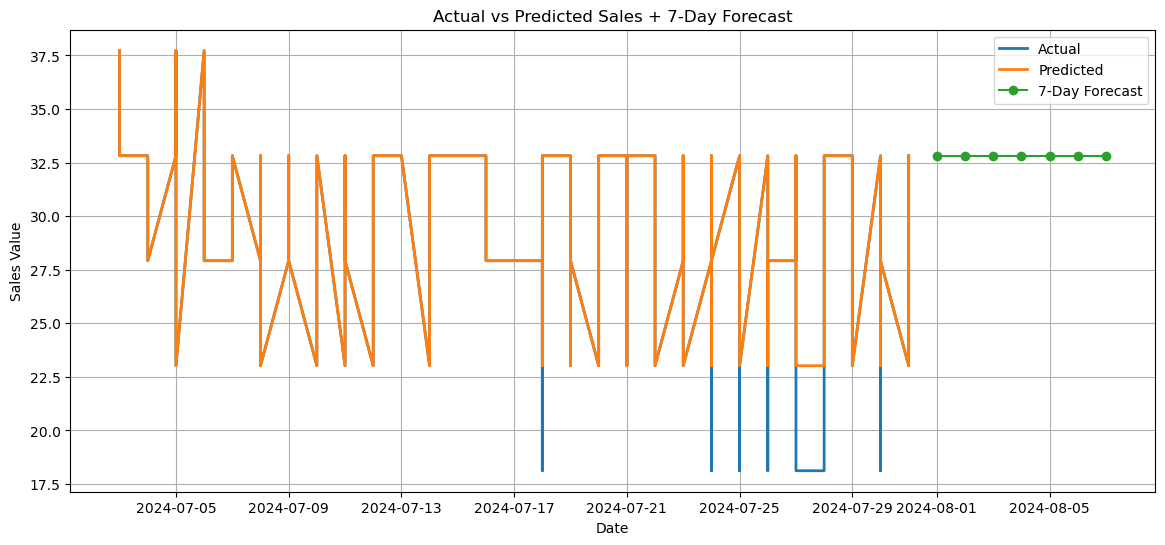

Saved figure: C:\Users\amins\OneDrive\Desktop\Unified Mentor\Coffee Sales\outputs\figures\fig_pred_vs_actual.png


In [8]:
# === SAFE & CORRECT Forecast vs Actual Plot ===

import os
import matplotlib.pyplot as plt
import pandas as pd

BASE = r"C:\Users\amins\OneDrive\Desktop\Unified Mentor\Coffee Sales"
OUT = os.path.join(BASE, "outputs")
FIG = os.path.join(OUT, "figures")

# Load features
df = pd.read_csv(os.path.join(OUT, "df_features_coffee.csv"))

# Ensure Date is datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Use same features used in model
feature_cols = ['Value', 'SMA_7', 'SMA_30', 'Vol_20']
df = df.dropna(subset=feature_cols)

# Train-test split (same as modeling)
from sklearn.model_selection import train_test_split
X = df[feature_cols]
y = df['Value']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, shuffle=False
)

# Predictions
pred_test = rf.predict(X_test)

# Get matching dates for test part
test_dates = df['Date'].iloc[-len(y_test):]

# Plot actual vs predicted
plt.figure(figsize=(14,6))
plt.plot(test_dates, y_test.values, label="Actual", linewidth=2)
plt.plot(test_dates, pred_test, label="Predicted", linewidth=2)

# Forecast future 7 days
import pandas as pd
future_dates = pd.date_range(start=df['Date'].iloc[-1], periods=8)[1:]  # next 7 days

plt.plot(future_dates, future_preds, label="7-Day Forecast", marker='o')

plt.title("Actual vs Predicted Sales + 7-Day Forecast")
plt.xlabel("Date")
plt.ylabel("Sales Value")
plt.legend()
plt.grid(True)

save_path = os.path.join(FIG, "fig_pred_vs_actual.png")
plt.savefig(save_path, dpi=300)
plt.show()

print("Saved figure:", save_path)
